# Supervised Learning with scikit-learn - Datacamp
### Notes by César Muro.

In [1]:
# Importing pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing the course datasets 
diabetes_df = pd.read_csv('datasets/diabetes_clean.csv')
music_df = pd.read_csv('datasets/music_clean.csv')
sales_df = pd.read_csv('datasets/advertising_and_sales_clean.csv')
churn_df = pd.read_csv("datasets/telecom_churn_clean.csv")

Machine learning is the process whereby: 
* Computers are given the ability to learn to make decisions from data without being explicitly programmed.

Unsupervised learning: Uncovering hidden patterns from unlabeled data. For example, clustering.  
  
Supervised learning: The predicted values are already known. The aim is to predict the target values of unseen data, given the features. It uses features to predict the target variable  

Types of supervised learning:  

* Classification: Target variable consists of categories.  
* Regression: The target variable is continuos.

**Requierements before supervised learning**:  
* No missing values
* Data in numeric format
* Data stored in pandas DataFrame or Numpy array  
   
**Perform exploratory data analysis**   



In [3]:
# Let us know the characteristics of the dataset and if there is null values
print(churn_df.info())
print(churn_df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              3333 non-null   int64  
 1   account_length          3333 non-null   int64  
 2   area_code               3333 non-null   int64  
 3   international_plan      3333 non-null   int64  
 4   voice_mail_plan         3333 non-null   int64  
 5   number_vmail_messages   3333 non-null   int64  
 6   total_day_minutes       3333 non-null   float64
 7   total_day_calls         3333 non-null   int64  
 8   total_day_charge        3333 non-null   float64
 9   total_eve_minutes       3333 non-null   float64
 10  total_eve_calls         3333 non-null   int64  
 11  total_eve_charge        3333 non-null   float64
 12  total_night_minutes     3333 non-null   float64
 13  total_night_calls       3333 non-null   int64  
 14  total_night_charge      3333 non-null   

**scikit-learn syntax**  
from sklearn.module import Model  
model=Model()  
model.fit(X,y)  
predictions=model.predict(X_new)    
print(predictions)  

## The classification challenge

**Classifying labels of unseen data**  
1. Build a model 
2. Model learns from the the labeled data we pass to it  
3. Pass unlabed data to the model as input
4. Model predicts the labels of unseen data.

Labeled data=training data

## k-Nearest Neighbor (KNN)  

 The idea of k-Nearest Neighbors, or KNN, is to predict the label of any data point by looking at the k closest labeled data points and getting them to vote on what label the unlabeled observation should have. KNN uses majority voting, which makes predictions based on what label the majority of nearest neighbors have.  
 
 **Using scikit-learn to fit a classifier**   
We need that the features are in an array where each column is a feature and each row a different observation.  The target must be a single column with the same number of observations as the feature data.   
   
 from sklearn.neighbors import KNeighborsClasiffier  
 knn=KNeighborsClassifier(n_neighbors=15)      
 knn.fit(X,y)  
 prediction=knn.predict(X_new)
 
 

k-Nearest Neighbors: Fit

In this exercise, we build a classification model using the churn_df dataset.

The features to use will be "account_length" and "customer_service_calls". The target, "churn", needs to be a single column with the same number of observations as the feature data.

You will convert the features and the target variable into NumPy arrays, create an instance of a KNN classifier, and then fit it to the data.


In [4]:
import numpy as np
# Import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier 

# Create arrays for the features and the target variable
y = churn_df["churn"].values
X = churn_df[["account_length", "customer_service_calls"]].values

# Create a KNN classifier with 6 neighbors
knn = KNeighborsClassifier(n_neighbors=6)

# Fit the classifier to the data
knn.fit(X,y)

#Now you have fit a KNN classifier, you can use it to predict the label of new data points.  
X_new = np.array([[30.0, 17.5],
                  [107.0, 24.1],
                  [213.0, 10.9]]) 

# Predict the labels for the X_new
y_pred = knn.predict(X_new)

# Print the predictions for X_new
print("Predictions: {}".format(y_pred)) 

Predictions: [0 1 0]


### Measuring model performance  
How do we know the model is making correct predictions?  
  
* In classification, accuracy is a commonly used metric: $accuracy=\frac{correct predictions}{total observations}$. 
* As we know, it is common to split data in the training set and test set.  
* We calculate the accuracy using the model on the test set.  

**In scikit-learn we use**  
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=21, stratify=y)  

We commonly use 20-30% of our data as the test set. By setting the test_size argument to 0.3 we use 30% here. The random_state argument sets a seed for a random number generator that splits the data. Using the same number when repeating this step allows us to reproduce the exact split and our downstream results. It is best practice to ensure our split reflects the proportion of labels in our data. So if churn occurs in 10% of observations, we want 10% of labels in our training and test sets to represent churn. We achieve this by setting stratify=y. 
  
To check the accuracy we use the method:  
knn.score(x_test,y_test)

**Model complexity**  
* Large k = less complex model= can cause underfitting  
* Small k = complex model = can cause overfitting  
  
  We can also interpret k using a model complexity curve. With a KNN model, we can calculate accuracy on the training and test sets using incremental k values, and plot the results. We create empty dictionaries to store our train and test accuracies, and an array containing a range of k values. We use a for loop to repeat our previous workflow, building several models using a different number of neighbors. We loop through our neighbors array and, inside the loop, we instantiate a KNN model with n_neighbors equal to the neighbor iterator, and fit to the training data. We then calculate training and test set accuracy, storing the results in their respective dictionaries.  
  
train_accuracies={}  
test_accuracies={}  
neighbors=np.arange(1,26)  
  
for neighbor in neighbors:  
  - knn=KNeighborsClassifier(n_neighbors=neighbor)
  - kkn.fit(X_train,y_train)  
  - train_accuracies[neighbor]=knn.score(X_train,y_train)  
  - test_accuracies[neighbor]=knn.score(X_test,y_test)  
   
plt.figure(fig_size=(8,6))  
plt.title('Varying number of neighbors')  
plt.plot(neighbors,train_accuracies.values,label="Training accuracy")  
plt.plot(neighbors,test_accuracies.values,label="Test accuracy")  
plt.legend()  
plt.xlabel("Number of neighbors")  
plt.ylabel("Accuracy")  
plt.show()
    
  

Train/test split + computing accuracy

It's time to practice doing this on the churn_df dataset! 

In [5]:
# Import the module
from sklearn.model_selection import train_test_split

X = churn_df.drop("churn", axis=1).values
y = churn_df["churn"].values

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the classifier to the training data
knn.fit(X_train,y_train)

# Print the accuracy
print(knn.score(X_test, y_test))

0.8545727136431784


Overfitting and underfitting

Interpreting model complexity is a great way to evaluate performance when utilizing supervised learning. Your aim is to produce a model that can interpret the relationship between features and the target variable, as well as generalize well when exposed to new observations.

You will generate accuracy scores for the training and test sets using a KNN classifier with different n_neighbor values, which you will plot 

In [6]:
# Create neighbors
neighbors = np.arange(1,13)
train_accuracies = {}
test_accuracies = {}

for neighbor in neighbors:
  
	# Set up a KNN Classifier
	knn = KNeighborsClassifier(n_neighbors=neighbor)
  
	# Fit the model
	knn.fit(X_train, y_train)
  
	# Compute accuracy
	train_accuracies[neighbor] = knn.score(X_train, y_train)
	test_accuracies[neighbor] = knn.score(X_test, y_test)
print(neighbors, '\n', train_accuracies, '\n', test_accuracies)

[ 1  2  3  4  5  6  7  8  9 10 11 12] 
 {1: 1.0, 2: 0.8885971492873218, 3: 0.8994748687171793, 4: 0.8750937734433608, 5: 0.878469617404351, 6: 0.8660915228807202, 7: 0.8705926481620405, 8: 0.8615903975993998, 9: 0.86384096024006, 10: 0.858589647411853, 11: 0.8604651162790697, 12: 0.8574643660915229} 
 {1: 0.7856071964017991, 2: 0.8470764617691154, 3: 0.8320839580209896, 4: 0.856071964017991, 5: 0.8545727136431784, 6: 0.8590704647676162, 7: 0.8605697151424287, 8: 0.8620689655172413, 9: 0.863568215892054, 10: 0.8605697151424287, 11: 0.8605697151424287, 12: 0.8605697151424287}


Now we have calculated the accuracy of the KNN model on the training and test sets using various values of n_neighbors, you can create a model complexity curve to visualize how performance changes as the model becomes less complex!

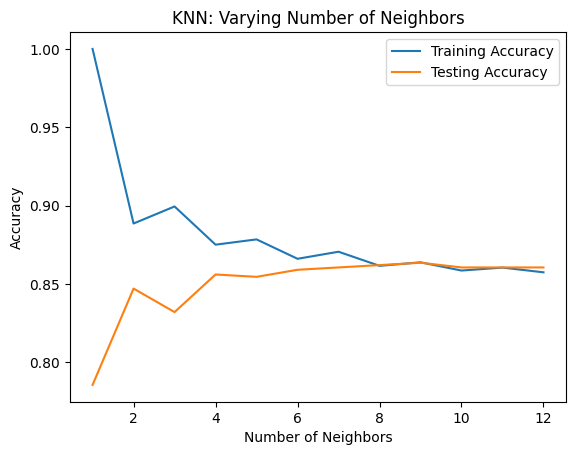

In [7]:
import matplotlib.pyplot as plt
# Add a title
plt.title("KNN: Varying Number of Neighbors")

# Plot training accuracies
plt.plot(neighbors, train_accuracies.values(), label="Training Accuracy")

# Plot test accuracies
plt.plot(neighbors, test_accuracies.values(), label="Testing Accuracy")

plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")

# Display the plot
plt.show()

See how training accuracy decreases and test accuracy increases as the number of neighbors gets larger. For the test set, accuracy peaks with 7 neighbors, suggesting it is the optimal value for our model.

## Regression

The target variable is numeric. We fit a linear regression model using scikit-learn with LinearRegression model.  

The sales_df dataset contains information on advertising campaign expenditure across different media types, and the number of dollars generated in sales for the respective campaign.

In [19]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4546 entries, 0 to 4545
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   tv            4546 non-null   float64
 1   radio         4546 non-null   float64
 2   social_media  4546 non-null   float64
 3   influencer    4546 non-null   object 
 4   sales         4546 non-null   float64
dtypes: float64(4), object(1)
memory usage: 177.7+ KB


You will use the advertising expenditure as features to predict sales values, initially working with the "radio" column. However, before you make any predictions you will need to create the feature and target arrays, reshaping them to the correct format for scikit-learn.

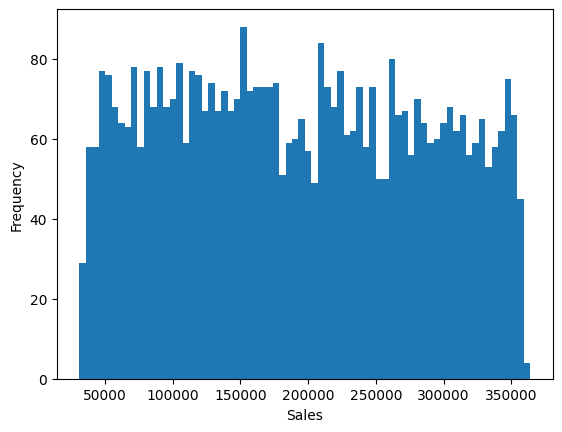

In [14]:
plt.hist(sales_df.sales,bins=70)
plt.xlabel("Sales")
plt.ylabel("Frequency")
plt.show()

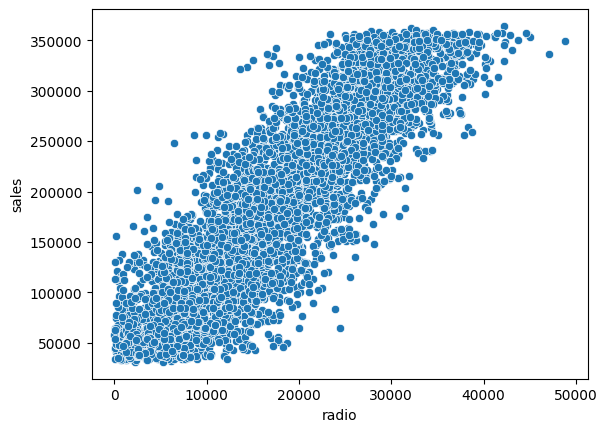

El coeficiente de correlación es:  0.868637813602153


In [8]:
sns.scatterplot(x="radio",y="sales",data=sales_df)
plt.show()
print("El coeficiente de correlación es: ",sales_df["radio"].corr(sales_df["sales"]))

In [9]:
import numpy as np

# Create X from the radio column's values
X = sales_df.radio.values

# Create y from the sales column's values
y = sales_df.sales.values

# Reshape X
X = X.reshape(-1,1)

# Check the shape of the features and targets
print(X.shape,y.shape)

(4546, 1) (4546,)


Building a linear regression model

Now you have created your feature and target arrays, you will train a linear regression model on all feature and target values.

As the goal is to assess the relationship between the feature and target values there is no need to split the data into training and test sets. 

In [10]:
# Import LinearRegression
from sklearn.linear_model import LinearRegression

# Create the model
reg = LinearRegression()

# Fit the model to the data
reg.fit(X,y)

# Make predictions
predictions = reg.predict(X)

print(predictions[:5])

[ 95491.17119147 117829.51038393 173423.38071499 291603.11444202
 111137.28167129]


Visualizing a linear regression model

Now you have built your linear regression model and trained it using all available observations, you can visualize how well the model fits the data. This allows you to interpret the relationship between radio advertising expenditure and sales values.

The variables X, an array of radio values, y, an array of sales values, and predictions, an array of the model's predicted values for y given X, have all been preloaded for you from the previous exercise.

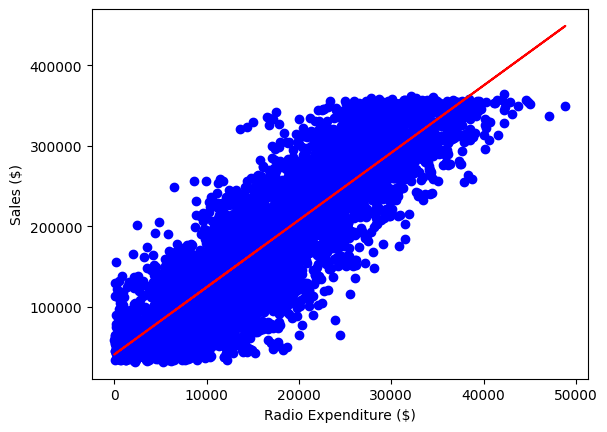

In [11]:
# Import matplotlib.pyplot
import matplotlib.pyplot as plt

# Create scatter plot
plt.scatter(X, y, color="blue")

# Create line plot
plt.plot(X, predictions, color="red")
plt.xlabel("Radio Expenditure ($)")
plt.ylabel("Sales ($)")

# Display the plot
plt.show()

### The basics of linear regression  
In regression, we fit the line $y=ax+b$. We need to find the best values for the parameters $a$ and $b$.  
To do this, we minimize the **error function**, which is also called *lost* or *cost* function.  
The error function for a linear model is the sum of the squared **residuals**, which is the distance between each point and the fit line.  
  
We can perform linear regression in higher dimensions, $$y=a_{1}x_{1}+a_{2}x_{2}+...+x_{n}+b$$  
where $x_{1},x_{2},...,x_{n}$ are the features, and we need to fit the parameters $a_{1},a_{2},...,a_{n},b$.  
  
The default metric for linear regression is *R-squared*, which quantifies the variance in target values explained by the features. The values range from (0,1).  
  
Another metrics are *mean squared error* (MSE) and *root mean squared error* (RMSE). Both are in target units. To import mean squared error:  
  
from sklearn.metrics import mean_squared_error  
mean_squared_error(y_test,y_pred,squared=False)

Now you have seen how linear regression works, your task is to create a multiple linear regression model using all of the features in the sales_df dataset.


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
# Create X and y arrays
X = sales_df.drop(["sales","influencer"], axis=1).values
y = sales_df["sales"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Instantiate the model
reg = LinearRegression()

# Fit the model to the data
reg.fit(X_train,y_train)

# Make predictions
y_pred = reg.predict(X_test)
print("Predictions: {}, Actual Values: {}".format(y_pred[:2], y_test[:2]))

Predictions: [53176.66154234 70996.19873235], Actual Values: [55261.28 67574.9 ]


In [13]:
# Import mean_squared_error
from sklearn.metrics import mean_squared_error

# Compute R-squared
r_squared = reg.score(X_test, y_test)

# Compute RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Print the metrics
print("R^2: {}".format(r_squared))
print("RMSE: {}".format(rmse))

R^2: 0.9990152104759368
RMSE: 2944.4331996001006


### Cross validation  
There is a potential pitfall on the previous process.  
* Model performance is dependent on the way we split up the data
* Not representative of the model's ability to generalize unseen data
* Solution: Cross validation!
  
The Cross-validation, or k-folds Cross validation steps:    
* We split the data into k=5 folds or groups.
* We set aside the first fold as a test set.  
* Fit the model on the remaining four folds, predict on our test set.
* Compute the metric of interest, let's say R-squared.  
* We set aside the second fold as our test set
* Fit on the remaining data.
* Compute metric of interest.
* Repeat for the rest of the folds.  
  
In scikit-learn we follow the syntax:  
from sklearn.model_selection import cross_val_score, KFold   
kf=KFold(n_splits=6,shuffle=True,random_state=42)  
reg=LinearRegression()  
cv_results= cross_val_score(reg,X,y,cv=kf)  


Cross-validation for R-squared

Cross-validation is a **vital** approach to evaluating a model. It maximizes the amount of data that is available to the model, as the model is not only trained but also tested on all of the available data.

In [14]:
# Import the necessary modules
from sklearn.model_selection import cross_val_score, KFold

# Create a KFold object
kf = KFold(n_splits=6, shuffle=True, random_state=5)

reg = LinearRegression()

# Compute 6-fold cross-validation scores
cv_scores = cross_val_score(reg, X, y, cv=kf)

# Print scores
print(cv_scores)

[0.99894062 0.99909245 0.9990103  0.99896344 0.99889153 0.99903953]


In [17]:
# Print the mean
print(np.mean(cv_scores))

# Print the standard deviation
print(np.std(cv_scores))

# Print the 95% confidence interval
print(np.quantile(cv_scores, [0.025, 0.975]))

0.9989896443678249
6.608118371529651e-05
[0.99889767 0.99908583]


## Regularized regression  
* Recall that linear regression minimizes a loss function.  
* It chooses a coefficient, a, for each feature variable, plus b.  
* Large coefficients can lead overfitting.
* Regularization: Penalize large coefficients.  
  
**Ridge regression**  
* Loss function = OLS loss function + $\alpha * \sum_{i=1}a_{i}^{2}$  
* Ridge penalizes large positive or negative coefficients.  
* $\alpha$: parameter wee need to choose.  
* Picking $\alpha$ is similar to picking $k$ in KNN.  
* **Hyperparameter**: variable used to optimize model parameters.  
* $\alpha$ controls model complexity.
  * $\alpha=0=OLS$ can lead to overfitting. 
  * Very high $\alpha:$ can lead underfitting.  
  
**Ridge regression in scikit-learn**  
from sklearn.linear_model import Ridge      
scores=[]    
for alpha in [0.1,1.0,10.0,100.0,1000.0]:  
   ridge=Ridge(alpha=alpha)  
   ridge.fit(X_train,y_train)  
   y_pred=ridge.predict(X_test)  
   scores.append(ridge.score(X_test,y_test))  

print(scores)  
  
**Lasso regression**  
* Loss function = OLS loss function + $\alpha*\sum_{i=1}^{n}|a_{i}|^{2}$.    
* Lasso can select important features of a dataset.  
* Shrinks the coefficients of less important features to zero.  
* Features not shrunk to zero are selected by lasso.  
  
from sklearn.linear_model import Lasso  
...  
lasso=Lasso(alpha=0.1)    
lasso_coef=lasso.fit(X,y).coef_  

Ridge regression performs regularization by computing the squared values of the model parameters multiplied by alpha and adding them to the loss function.

In this exercise, you will fit ridge regression models over a range of different alpha values, and print their
scores. You will use all of the features in the sales_df dataset to predict "sales"

In [21]:
sales_df.head()

,tv,radio,social_media,influencer,sales
0,16000.0,6566.23,2907.98,Mega,54732.76
1,13000.0,9237.76,2409.57,Mega,46677.90
2,41000.0,15886.45,2913.41,Mega,150177.83
3,83000.0,30020.03,6922.30,Mega,298246.34
4,15000.0,8437.41,1406.00,Micro,56594.18


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge

X=sales_df.drop(["sales","influencer"],axis=1).values
y=sales_df["sales"].values  

X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=42)


alphas = [0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0]
ridge_scores = []
for alpha in alphas:
  
  # Create a Ridge regression model
  ridge = Ridge(alpha=alpha)
  
  # Fit the data
  ridge.fit(X_train,y_train)
  
  # Obtain R-squared
  score = ridge.score(X_test,y_test)
  ridge_scores.append(score)
print(ridge_scores)

[0.9990152104759369, 0.9990152104759373, 0.9990152104759419, 0.9990152104759871, 0.9990152104764387, 0.9990152104809561]


Lasso regression for feature importance

Lasso regression can be used to identify important features in a dataset.

Fit a lasso regression model to the sales_df data and plot the model's coefficients.

[ 3.56256962 -0.00397035  0.00496385]


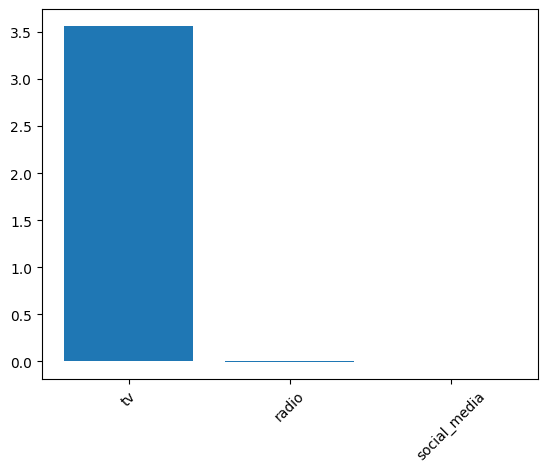

In [25]:
# Import Lasso
from sklearn.linear_model import Lasso

# Instantiate a lasso regression model
lasso = Lasso(alpha=0.3)

# Fit the model to the data
lasso.fit(X,y)

# Compute and print the coefficients
lasso_coef = lasso.fit(X,y).coef_
print(lasso_coef)
sales_columns=['tv', 'radio', 'social_media']
plt.bar(sales_columns, lasso_coef)
plt.xticks(rotation=45)
plt.show()

The figure makes it clear that expenditure on TV advertising is the most important feature in the dataset to predict sales values! 

## Fine-Tuning Your Model

* Class imbalance: uneven frequency of classes.  
* It needs a diferent way to asses the problem.  
  
  
* Given a binary classifier, we can create a confusion matrix.  
  
   
|                  | **predicted false** | **predicted true** |
|------------------|---------------------|--------------------|
| **actual false** | correct             | false positive     |
| **actual true**  | false negative      | correct            |

The counts of each outcome are called confusion matrix.  

| **true negative**  | **false positive** |
|--------------------|--------------------|
| **false negative** | **true positive**  |  
  
Usually, the class of interest is called *positive class*.  
  
* From the confusion matrix we can get different metrics:
* Accuracy: $\frac{tp+tn}{tp+fp+tn+fn}$  
* Precision: $\frac{tp}{tp+fp}$
* Recall or sensitivity: $\frac{tp}{tp+fn}$  
* F1 score: $2*\frac{precision*recall}{precision+recall}$  

In scikit-learn:  
from sklearn.metrics import classification_report, confusion_matrix  
...  
confusion_matrix(y_test,y_pred)  
classification_report(y_test,y_pred)  


Assessing a diabetes prediction classifier

In this chapter you'll work with the diabetes_df dataset introduced previously.

The goal is to predict whether or not each individual is likely to have diabetes based on the features body mass index (BMI) and age (in years). Therefore, it is a binary classification problem. A target value of 0 indicates that the individual does not have diabetes, while a value of 1 indicates that the individual does have diabetes. 

In [26]:
diabetes_df.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [27]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   pregnancies  768 non-null    int64  
 1   glucose      768 non-null    int64  
 2   diastolic    768 non-null    int64  
 3   triceps      768 non-null    int64  
 4   insulin      768 non-null    int64  
 5   bmi          768 non-null    float64
 6   dpf          768 non-null    float64
 7   age          768 non-null    int64  
 8   diabetes     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


We add a new column called case where we label the binary classification as Diabetic and Non diabetic.

In [29]:
diabetes_df["case"]=np.where(diabetes_df["diabetes"]==1,"Diabetic","Non diabetic")

In [30]:
diabetes_df

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes,case
0,6,148,72,35,0,33.6,0.627,50,1,Diabetic
1,1,85,66,29,0,26.6,0.351,31,0,Non diabetic
2,8,183,64,0,0,23.3,0.672,32,1,Diabetic
3,1,89,66,23,94,28.1,0.167,21,0,Non diabetic
4,0,137,40,35,168,43.1,2.288,33,1,Diabetic
...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0,Non diabetic
764,2,122,70,27,0,36.8,0.340,27,0,Non diabetic
765,5,121,72,23,112,26.2,0.245,30,0,Non diabetic
766,1,126,60,0,0,30.1,0.349,47,1,Diabetic


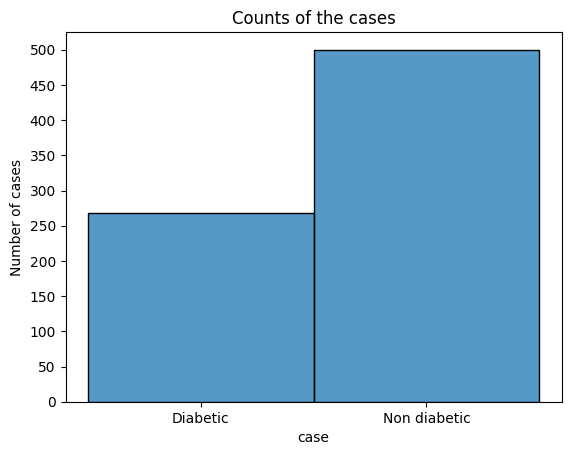

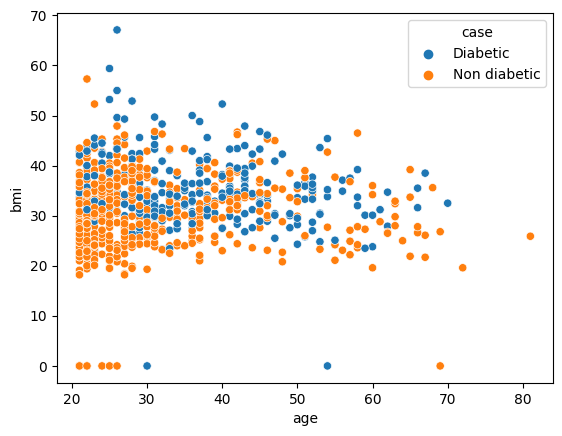

In [64]:
sns.histplot(x="case",data=diabetes_df,binwidth = 0.5).set(title="Counts of the cases")
plt.ylabel("Number of cases")
plt.yticks(np.arange(0,501,50))
plt.show()
sns.scatterplot(x="age",y="bmi",hue="case",data=diabetes_df)
plt.show()

Assessing a diabetes prediction classifier  

The goal is to predict whether or not each individual is likely to have diabetes based on the features body mass index (BMI) and age (in years). Therefore, it is a binary classification problem. A target value of 0 indicates that the individual does not have diabetes, while a value of 1 indicates that the individual does have diabetes. 

In [2]:
from sklearn.model_selection import train_test_split
X=diabetes_df[['bmi','age']]
y=diabetes_df[['diabetes']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

In [3]:
# Import confusion_matrix and classification_report.
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

knn = KNeighborsClassifier(n_neighbors=6)

# Fit the model to the training data
knn.fit(X_train,y_train)

# Predict the labels of the test data: y_pred
y_pred = knn.predict(X_test)

# Generate the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[85 15]
 [37 17]]
              precision    recall  f1-score   support

           0       0.70      0.85      0.77       100
           1       0.53      0.31      0.40        54

    accuracy                           0.66       154
   macro avg       0.61      0.58      0.58       154
weighted avg       0.64      0.66      0.64       154



The model produced 34 true positives and 35 false positives, meaning precision was less than 50%, which is confirmed in the classification report. The output also shows a better F1-score for the zero class, which represents individuals who do not have diabetes.  

## Logistic regression and the ROC curve.  
**Logistic regression for binary classification**  
* Logistic regression is used for classification problems. 
* Logistic regression outputs probabilities.  
* It produces a decision linear boundary.  
    
      
The syntax in scikit-learn:  
from sklearn.linear_model import LogisticRegression    
logreg=LogisticRegression()  
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)  
logreg.fit(X_train,y_train)  
y_pred=logreg.predict(X_test)  
  
y_pred_probs=logreg.predict_proba(X_test)[:,1]    

* By default, probability logistic regression treshold is 0.5  
* We can use a receiver operating characteristic, or ROC curve
  
In scikit learn:  
from sklearn.metrics import roc_curve  
fpr, tpr, tresholds= roc_curve(y_test,y_pred_probs)  
plt.plot([0,1],[0,1],'k--')  
plt.plot(fpr,tpr)  
...  
  
How do we quantify the model?  
We calculate the area under ROC curve, a metric called as **AUC**. Scores range from zero to one, with one being ideal. In scikit learn:  
  
from sklearn.metric import roc_auc_score   
print(roc_auc_score(y_test,y_pred_probs))  


Building a logistic regression model  
  
Now, we build a logistic regression model using all features in the diabetes_df dataset. The model will be used to predict the probability of individuals in the test set having a diabetes diagnosis. 

In [68]:
# Import LogisticRegression
from sklearn.linear_model import LogisticRegression

# Instantiate the model
logreg = LogisticRegression()

# Fit the model
logreg.fit(X_train,y_train)

# Predict probabilities
y_pred_probs = logreg.predict_proba(X_test)[:,1]

print(y_pred_probs[:10])

[0.28460039 0.56085879 0.33436004 0.23143063 0.00991472 0.26068394
 0.72355048 0.24526952 0.1729711  0.63601845]


Now let's plot the ROC curve to visualize performance using different thresholds.

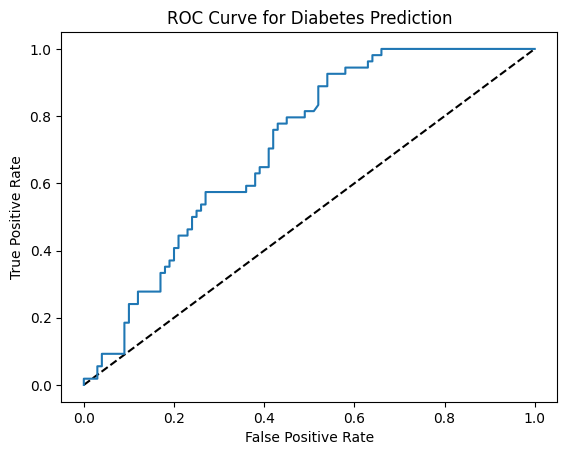

In [69]:
# Import roc_curve
from sklearn.metrics import roc_curve

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)

plt.plot([0, 1], [0, 1], 'k--')

# Plot tpr against fpr
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Diabetes Prediction')
plt.show()

The ROC curve is above the dotted line, so the model performs better than randomly guessing the class of each observation.  

Now compute the area under the ROC curve, along with the other classification metrics we have used previously.

In [70]:
# Import roc_auc_score
from sklearn.metrics import roc_auc_score  
from sklearn.metrics import classification_report, confusion_matrix


# Calculate roc_auc_score
print(roc_auc_score(y_test, y_pred_probs))

# Calculate the confusion matrix
print(confusion_matrix(y_test, y_pred))

# Calculate the classification report
print(classification_report(y_test, y_pred))

0.7106481481481481
[[85 15]
 [37 17]]
              precision    recall  f1-score   support

           0       0.70      0.85      0.77       100
           1       0.53      0.31      0.40        54

    accuracy                           0.66       154
   macro avg       0.61      0.58      0.58       154
weighted avg       0.64      0.66      0.64       154



 A ROC AUC score of 0.7102 means this model is 51% better than a chance model at correctly predicting labels! scikit-learn makes it easy to produce several classification metrics with only a few lines of code.

## Hyperparameter tuning  
Optimize our model.  
* Ridge/lasso regression: Choosing alpha.  
* KNN: Choosing n_neighbors.  
* **Hyperparameters**: Parameters we specify before fitting the model:  
   * Like alpha and n_neighbors  
  
So,a fundamental step for building a succesful model is choosing the correct hyperparameters:  
1. Try losts of different hyperparameter values  
2. Fit all of them separately  
3. See how well they perform  
4. Choose the best performing values  
   
* This is called **hyperparameter tunning**
* It is essential to use cross-validation to avoid overfitting to the test set.   
* We can still split the data and perform cross-validation on the training set.  
* We withhold the test set for final evaluation.  

One approach for hyperparamter tuning is called **grid search**:  
  
from sklearn.model_selection import GridSearchCV  
kf=KFold(n_splits=5,shuffle=True,random_state=42)  
param_grid={"alpha":np.arange(0.0001,1,10),"solver":["sag","lsqr"]}  
ridge=Ridge()  
ridge_cv=GridSearchCV(ridge, para_grid, cv=kf)
ridge_cv.fit(X_train,y_train)  
print(ridge_cv.best_params_,ridge_cv.best_score_)  

**RandomizedSearchCV**  
Picking random hyperparameter values rather than exhaustively through all options.  In scikit-learn:  
  
from sklear.model_selection import RandomizedSearchCv  
kf=KFold(n_splits=5,shuffle=True,random_state=42)  
param_grid={"alpha":np.arange(0.0001,1,10),"solver":["sag","lsqr"]}  
ridge=Ridge()  
ridge_cv=GridSearchCV(ridge, para_grid, cv=kf,n_iter=2)  
ridge_cv.fit(X_train,y_train)  
print(ridge_cv.best_params_,ridge_cv.best_score_) 

Now, let us build a lasso regression model with optimal hyperparameters to predict blood glucose levels using the features in the diabetes_df dataset.

In [16]:
from sklearn.model_selection import train_test_split, KFold
X=diabetes_df[['pregnancies','diastolic','triceps','insulin','bmi','dpf','age','diabetes']]
y=diabetes_df[['glucose']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
kf=KFold(n_splits=5, random_state=42, shuffle=True)

In [18]:
# Import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

lasso=Lasso()
# Set up the parameter grid for "alpha", using np.linspace() to create 20 evenly spaced values ranging from 0.00001 to 1.
param_grid = {"alpha": np.linspace(0.00001, 1, 20)}

# Call GridSearchCV(), passing lasso, the parameter grid, and setting cv equal to kf
lasso_cv = GridSearchCV(lasso, param_grid, cv=kf)

# Fit to the training data
lasso_cv.fit(X_train,y_train)
print("Tuned lasso paramaters: {}".format(lasso_cv.best_params_))
print("Tuned lasso score: {}".format(lasso_cv.best_score_))

Tuned lasso paramaters: {'alpha': 1e-05}
Tuned lasso score: 0.33078807238121977


Unfortunately, the best model only has an R-squared score of 0.33, highlighting that using the optimal hyperparameters does not guarantee a high performing model!

As you saw, GridSearchCV can be computationally expensive, especially if you are searching over a large hyperparameter space. In this case, you can use RandomizedSearchCV, which tests a fixed number of hyperparameter settings from specified probability distributions.

Training and test sets from diabetes_df have been pre-loaded for you as X_train. X_test, y_train, and y_test, where the target is "diabetes". A logistic regression model has been created and stored as logreg, as well as a KFold variable stored as kf.

You will define a range of hyperparameters and use RandomizedSearchCV, which has been imported from sklearn.model_selection, to look for optimal hyperparameters from these options.

In [23]:
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LogisticRegression 
X=diabetes_df[['pregnancies','diastolic','triceps','insulin','bmi','dpf','age']]
y=diabetes_df[['diabetes']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42,stratify=y)
kf=KFold(n_splits=5, random_state=42, shuffle=True)
logreg=LogisticRegression()

In [25]:
# Create the parameter space
from sklearn.model_selection import RandomizedSearchCV
params = {"penalty": ["l1", "l2"],
         "tol": np.linspace(0.0001, 1.0, 50),
         "C": np.linspace(0.1, 1.0, 50),
         "class_weight": ["balanced", {0:0.8, 1:0.2}]}

# Instantiate the RandomizedSearchCV object
logreg_cv = RandomizedSearchCV(logreg, params, cv=kf)

# Fit the data to the model
logreg_cv.fit(X_train, y_train)

# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_))
print("Tuned Logistic Regression Best Accuracy Score: {}".format(logreg_cv.best_score_))


Tuned Logistic Regression Parameters: {'tol': 0.5102530612244898, 'penalty': 'l2', 'class_weight': 'balanced', 'C': 0.889795918367347}
Tuned Logistic Regression Best Accuracy Score: 0.6938557910169265


 Even without exhaustively trying every combination of hyperparameters, the model has an accuracy of over 70% on the test set! So far we have worked with clean datasets

# Preprocessing and Pipelines

Recall that in scikit-learn we need: 
* Numerical data
* No missing values
  
However, with real-world data, we need to preprocess our data first.   

**Dealing with categorical features**  
* scikit-learn does not accept categorical features by default  
* Need to convert categorical features into numerical values
* Convert to binary features called dummy variables:
        * 0: Observation was not that category
        * 1: Observation was that category  
  
**Creating dummy variables**
* scikit-learn: OneHotEncoder()
* pandas: get_dummies()  
  
import pandas as pd  
df=  
df_dummies=pd.get_dummies(df['colcate'],drop_first=True)    
df_dummies=pd.concat([df,df_dummies],axis=1) 
  
If the dataframe only has a categorical feature we can pass the entire dataframe  
data_dummies=pd.get_dummies(df,drop_first=True)  


Creating dummy variables  
Being able to include categorical features in the model building process can enhance performance as they may add information that contributes to prediction accuracy.

In [4]:
import pandas as pd
# Create music_dummies
music_dummies = pd.get_dummies(music_df,drop_first=True)

# Print the new DataFrame's shape
print("Shape of music_dummies: {}".format(music_dummies.shape))

Shape of music_dummies: (1000, 13)


Regression with categorical features

Now you have created music_dummies, containing binary features for each song's genre, it's time to build a ridge regression model to predict song popularity.

In [7]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import Ridge
kf=KFold(n_splits=5, random_state=42, shuffle=True)
# Create X and y
X = music_dummies.drop(['popularity'],axis=1).values
y = music_dummies.popularity.values

# Instantiate a ridge model
ridge = Ridge(alpha=0.2)

# Perform cross-validation
scores = cross_val_score(ridge,X, y, cv=kf, scoring="neg_mean_squared_error")

# Calculate RMSE
rmse = np.sqrt(-scores)
print("Average RMSE: {}".format(np.mean(rmse)))
print("Standard Deviation of the target array: {}".format(np.std(y)))

Average RMSE: 10.033098690539362
Standard Deviation of the target array: 14.02156909907019


An average RMSE of approximately 10.0 is lower than the standard deviation of the target variable (song popularity), suggesting the model is reasonably accurate.

**Handling with missing data**  
* No value for a feature in a particular row
* A common approach is to drop missing observations accounting for less than 5% of all data. We use dropnna method.
* Another approach is impute missing data. This means making an educated guess to replace it. Common to use the mean or the media. For categorical, the most frequent value.
* We must split our data before imputing to avoid *data leakage*   

Imputation with sklearn.impute:  

In [12]:
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split  
X_cat=music_df.genre.values.reshape(-1,1)
X_num=music_df.drop(["genre","popularity"],axis=1).values
y=music_df.popularity.values
X_train_cat, X_test_cat, y_train, y_test=train_test_split(X_cat,y,test_size=0.2,random_state=12)
imp_cat=SimpleImputer(strategy="most_frequent")

In [15]:
# For our numeric data, we instantiate another imputer
imp_num=SimpleImputer()
X_train_num=imp_num.fit_transform(X_train_num)
X_test_num=imp_num.transform(X_test_num)
X_train=np.append(X_train_num,X_train_cat,axis=1)
# We repeat for the test data
X_test=np.append(X_test_num,X_test_cat,axis=1)

* imputers are known as transformers

**Imputing with a pipeline**
* We can also impute using a *pipeline*, which is an object used to run a series of transformations and build a model in a single workflow.  
* To buil a pipeline we construct a list of steps containing tuples with the steps names specified as strin, and instantiate the transformer or model. 
 
 from sklearn.pipeline import Pipeline  
 steps=[("imputation",SimpleImputer()),("logistic_regression",LogisticRegression())]  
 pipeline=Pipeline(steps)  
 X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=42)  
 pipeline.fit(X-train,y_train)  
 pipeline.score(X_test,y_test)  

Dropping missing data

Over the next three exercises, you are going to tidy the music_df dataset. You will create a pipeline to impute missing values and build a KNN classifier model, then use it to predict whether a song is of the "Rock" genre.

In this exercise specifically, you will drop missing values accounting for less than 5% of the dataset, and convert the "genre" column into a binary feature.

In [43]:
music_df.head()

,Unnamed: 0,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,genre
0,36506,60.0,0.896000,0.726,214547.0,0.177,0.000002,0.1160,-14.824,0.0353,92.934,0.618,1
1,37591,63.0,0.003840,0.635,190448.0,0.908,0.083400,0.2390,-4.795,0.0563,110.012,0.637,1
2,37658,59.0,0.000075,0.352,456320.0,0.956,0.020300,0.1250,-3.634,0.1490,122.897,0.228,1
3,36060,54.0,0.945000,0.488,352280.0,0.326,0.015700,0.1190,-12.020,0.0328,106.063,0.323,1
4,35710,55.0,0.245000,0.667,273693.0,0.647,0.000297,0.0633,-7.787,0.0487,143.995,0.300,1


In [46]:
print(music_df.genre.value_counts())
#Define the variables X,y  
X=music_df.drop(["genre"],axis=1).values
y=music_df.genre.values

1    500
0    500
Name: genre, dtype: int64


The dataset provided is different from the course, this one is already cleaned and the genre column only contains 0, and 1. Then the following chunk es de chocalate, that is the reason we define the arrays X, y previously.

In [32]:

# Print missing values for each column
print(music_df.isna().sum().sort_values())

# Remove values where less than 5% are missing
music_df = music_df.dropna(subset=["genre", "popularity", "loudness", "liveness", "tempo"])

# Convert music_df["genre"] to values of 1 if the row contains "Rock", otherwise change the value to 0.
music_df["genre"] = np.where(music_df["genre"] == "Rock", 1, 0)


print(music_df.isna().sum().sort_values())
print("Shape of the `music_df`: {}".format(music_df.shape))


Unnamed: 0          0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
genre               0
dtype: int64
Unnamed: 0          0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
genre               0
dtype: int64
Shape of the `music_df`: (1000, 13)


Now it's time to build a pipeline. It will contain steps to impute missing values using the mean for each feature and build a KNN model for the classification of song genre.

In [47]:
from sklearn.neighbors import KNeighborsClassifier
# Import modules
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42,stratify=y)

# Instantiate an imputer
imp_mean = SimpleImputer()

# Instantiate a knn model
knn = KNeighborsClassifier(n_neighbors=3)

# Build steps for the pipeline
steps = [("imputer", imp_mean), 
         ("knn", knn)]

# Create the pipeline
pipeline = Pipeline(steps)

# Fit the pipeline to the training data
pipeline.fit(X_train,y_train)

# Make predictions on the test set
y_pred = pipeline.predict(X_test)

# Print the confusion matrix
print(confusion_matrix(y_test, y_pred))

[[127  23]
 [  6 144]]


## Centering and scaling  
Another important steps of preprocessing in machine learning are centering and scaling.  
**Why scale or data?**
* Many ML models use some form of distance to inform them.  
* Features on larger scales can disproportionaly influence the model
* We want features to be similar on scale
* Normalizing or standardizing (scaling or centering)  
  
**How to scale the data?**  
* Substract the mean and divide by variance.
    - All features are centered around zero and have variance of one
    - This is called *standardization*
* Substract by the minimum and divide by the range
    - Minimum zero and maximum 1
* Can also normalize so the data ranges from -1 to 1

**In scikit-learn**  
from sklearn.preprocessing import StandardScaler    
from sklearn.model_selection import train_test_split  
X_train_ X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)  
scaler=StandardScaler()  
X_train_scaled= scaler.fit_transform(X_train)  
X_test_scaled= scaler.transform(X_test)  
  
**Scaling in a pipeline!**  
steps=[('scaler',StandardScaler()),('knn',KNeighborsClassifiers(n_neighbors=6))]  
pipeline=Pipeline(steps)  
X_train_ X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)     
knn_scaled=pipeline.fit(X_train,y_train)    
y_pred=knn.scaled.predict(X_test) 
print(kkn_scaled.score(X_test,y_test))  
  
**CV and scaling in a pipeline**  
from sklearn.model_selection import GridSearchCV   
steps=[('scale',StandardScaler()),('knn',KNeighborsClassifier())]  
pipeline= Pipeline(steps)  
parameters = {"knn_n_neighbors":np.arange(1.50)}    
X_train_ X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)   
cv=GridSearchCV(pipeline,param_grid=parameters)  
cv.fit(X_train,y_train)    
cv.predict(X_test)  
print(cv.best_score_)  
print(cv.best_params_)  

Centering and scaling for regression

Now you have seen the benefits of scaling your data, you will use a pipeline to preprocess the music_df features and build a lasso regression model to predict a song's loudness.

X_train, X_test, y_train, and y_test have been created from the music_df dataset, where the target is "loudness" and the features are all other columns in the dataset. Lasso and Pipeline have also been imported for you.

In [7]:
music_df.head()

,Unnamed: 0,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,genre
0,36506,60.0,0.896000,0.726,214547.0,0.177,0.000002,0.1160,-14.824,0.0353,92.934,0.618,1
1,37591,63.0,0.003840,0.635,190448.0,0.908,0.083400,0.2390,-4.795,0.0563,110.012,0.637,1
2,37658,59.0,0.000075,0.352,456320.0,0.956,0.020300,0.1250,-3.634,0.1490,122.897,0.228,1
3,36060,54.0,0.945000,0.488,352280.0,0.326,0.015700,0.1190,-12.020,0.0328,106.063,0.323,1
4,35710,55.0,0.245000,0.667,273693.0,0.647,0.000297,0.0633,-7.787,0.0487,143.995,0.300,1


In [8]:
X = music_df.drop(['popularity','Unnamed: 0'],axis=1).values
y = music_df["loudness"].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=12)  

In [9]:
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline
# Import StandardScaler
from sklearn.preprocessing import StandardScaler

# Create pipeline steps
steps = [("scaler", StandardScaler()),
         ("lasso", Lasso(alpha=0.5))]

# Instantiate the pipeline
pipeline = Pipeline(steps)
pipeline.fit(X_train, y_train)

# Calculate and print R-squared
print(pipeline.score(X_test, y_test))

0.9898432367409788


Centering and scaling for classification

Now you will bring together scaling and model building into a pipeline for cross-validation.

Your task is to build a pipeline to scale features in the music_df dataset and perform grid search cross-validation using a logistic regression model with different values for the hyperparameter C. The target variable here is "genre", which contains binary values for rock as 1 and any other genre as 0.

In [11]:
# Build the steps
import numpy as np
X = music_df.drop(['genre','Unnamed: 0'],axis=1).values
y = music_df["genre"].values
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
steps = [("scaler", StandardScaler()),
         ("logreg", LogisticRegression())]
pipeline = Pipeline(steps)

# Create the parameter space
parameters = {"logreg__C": np.linspace(0.001, 1.0, 20)}
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=21)

# Instantiate the grid search object
cv = GridSearchCV(pipeline, param_grid=parameters)

# Fit to the training data
cv.fit(X_train, y_train)
print(cv.best_score_, "\n", cv.best_params_)

0.8625 
 {'logreg__C': 0.15873684210526315}


Well done! Using a pipeline shows that a logistic regression model with "C" set to approximately 0.1 produces a model with 0.8625 accuracy!

### Evaluating multiple models  
**Some guidind principles**  
* Size of the dataset: 
     * fewer features: simpler model, faster training time  
     * Some models requieres large amounts of data to perform well
* Interpretability: 
     * Some models are easier to explain, which can be important for stakeholders
* Flexibility:  flexible models make fewer assumptions about the data; for example, a KNN model does not assume a linear relationship between the features and the target. 

**It's all in the metrics**
* Regression model performance: rmse, r-squared.  
* Classification model performance: Accuracy, confusion matrix, Precision, Recall, F1 Score, ROC AUC
* Train several models and evaluate performance out of box

**Models affected by scaling**  
* KNN
* Linear regression (Lasso, Ridge)  
* Logistic Regression
* Artificial Neural Network
* Best to scale our data before evaluating models

Visualizing regression model performance

Now you have seen how to evaluate multiple models out of the box, you will build three regression models to predict a song's "energy" levels.

The music_df dataset has had dummy variables for "genre" added. Also, feature and target arrays have been created, and these have been split into X_train, X_test, y_train, and y_test. 

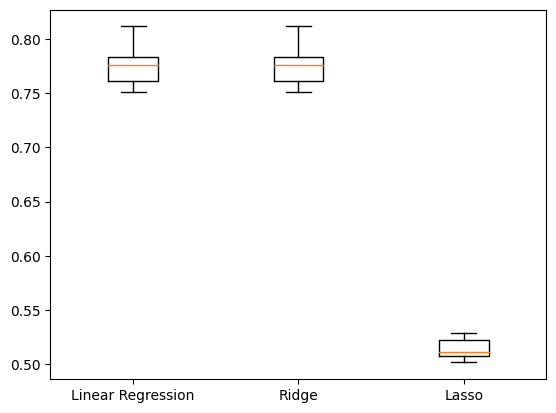

In [14]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge 
X = music_df.drop(['energy','Unnamed: 0'],axis=1).values
y=music_df.energy.values
models = {"Linear Regression": LinearRegression(), "Ridge": Ridge(alpha=0.1), "Lasso": Lasso(alpha=0.1)}
results = []
X_train, X_test,y_train, y_test =train_test_split(X,y,test_size=0.2,random_state=42) 
scaler=StandardScaler()  
X_train_scaled= scaler.fit_transform(X_train)  
X_test_scaled= scaler.transform(X_test) 
# Loop through the models' values
for model in models.values():
  kf = KFold(n_splits=6, random_state=42, shuffle=True)
  
  # Perform cross-validation
  cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=kf)
  
  # Append the results
  results.append(cv_scores)

# Create a box plot of the results
plt.boxplot(results, labels=models.keys())
plt.show()

Lasso regression is not a good model for this problem, while linear regression and ridge perform fairly equally. Let's make predictions on the test set, and see if the RMSE can guide us on model selection.

Predicting on the test set

In the last exercise, linear regression and ridge appeared to produce similar results. It would be appropriate to select either of those models; however, you can check predictive performance on the test set to see if either one can outperform the other.

You will use root mean squared error (RMSE) as the metric. 

In [15]:
# Import mean_squared_error
from sklearn.metrics import mean_squared_error

for name, model in models.items():
  
  # Fit the model to the training data
  model.fit(X_train_scaled, y_train)
  
  # Make predictions on the test set
  y_pred = model.predict(X_test_scaled)
  
  # Calculate the test_rmse
  test_rmse = mean_squared_error(y_test, y_pred, squared=False)
  print("{} Test Set RMSE: {}".format(name, test_rmse))

Linear Regression Test Set RMSE: 0.1114011650977189
Ridge Test Set RMSE: 0.11140405394479369
Lasso Test Set RMSE: 0.17329638628819166


The linear regression model just edges the best performance, although the difference is a RMSE of 0.00001 for popularity! Now let's look at classification model selection.

Visualizing classification model performance

In this exercise, you will be solving a classification problem where the "popularity" column in the music_df dataset has been converted to binary values, with 1 representing popularity more than or equal to the median for the "popularity" column, and 0 indicating popularity below the median.

Your task is to build and visualize the results of three different models to classify whether a song is popular or not.

In [17]:
music_df["popularity"].median()

54.0

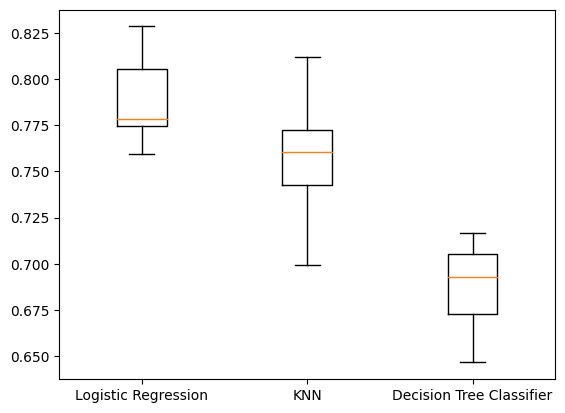

In [18]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
music_df["popularity"]=np.where(music_df["popularity"] >= music_df["popularity"].median(), 1, 0)
X = music_df.drop(['popularity','Unnamed: 0'],axis=1).values
y=music_df.popularity.values
X_train, X_test,y_train, y_test =train_test_split(X,y,test_size=0.2,random_state=42) 
scaler=StandardScaler()  
X_train_scaled= scaler.fit_transform(X_train)  
X_test_scaled= scaler.transform(X_test) 
# Create models dictionary
models = {"Logistic Regression": LogisticRegression(), "KNN": KNeighborsClassifier(), "Decision Tree Classifier": DecisionTreeClassifier()}
results = []
 
# Loop through the models' values
for model in models.values():
  
  # Instantiate a KFold object
  kf = KFold(n_splits=6, random_state=12, shuffle=True)
  
  # Perform cross-validation
  cv_results = cross_val_score(model, X_train_scaled, y_train, cv=kf)
  results.append(cv_results)
plt.boxplot(results, labels=models.keys())
plt.show()

Looks like logistic regression is the best candidate based on the cross-validation results! Let's wrap up by building a pipeline

Pipeline for predicting song popularity

For the final exercise, you will build a pipeline to impute missing values, scale features, and perform hyperparameter tuning of a logistic regression model. The aim is to find the best parameters and accuracy when predicting song genre! 

In [22]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression 
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV 
import pandas as pd
music_df = pd.read_csv('datasets/music_clean.csv')
music_df["popularity"]=np.where(music_df["popularity"] >= music_df["popularity"].median(), 1, 0)
X = music_df.drop(['genre','Unnamed: 0'],axis=1).values
y=music_df.genre.values
X_train, X_test,y_train, y_test =train_test_split(X,y,test_size=0.2,random_state=42) 
# Create steps
steps = [("imp_mean", SimpleImputer()), 
         ("scaler", StandardScaler()), 
         ("logreg", LogisticRegression())]

# Set up pipeline
pipeline = Pipeline(steps)
params = {"logreg__solver": ["newton-cg", "saga", "lbfgs"],
         "logreg__C": np.linspace(0.001, 1.0, 10)}

# Create the GridSearchCV object
tuning = GridSearchCV(pipeline, param_grid=params)
tuning.fit(X_train, y_train)
y_pred = tuning.predict(X_test)

# Compute and print performance
print("Tuned Logistic Regression Parameters: {}, Accuracy: {}".format(tuning.best_params_, tuning.score(X_test,y_test)))

Tuned Logistic Regression Parameters: {'logreg__C': 0.223, 'logreg__solver': 'newton-cg'}, Accuracy: 0.79


Excellent - you've selected a model, built a preprocessing pipeline, and performed hyperparameter tuning to create a model that is 79% accurate in predicting song genres!